# Imports

In [ ]:
# Import necessary libraries
import imageio
import numpy as np
import os
import matplotlib.pyplot as plt
from background_remover import *


# Path to the images
image_folder = "../Data/Week2/qsd2_w2/"  # Update this path as necessary
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
mask_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
image_files.sort()
mask_files.sort()

In [2]:
def rgb2gray(image):
    """Convert an RGB image to grayscale."""
    # Normalize RGB values to [0, 1]
    image = image / 255.0

    # Apply the standard RGB-to-grayscale formula:
    # Luminance = 0.2989 * R + 0.5870 * G + 0.1140 * B
    gray_image = 0.2989 * image[..., 0] + 0.5870 * image[..., 1] + 0.1140 * image[..., 2]

    # Ensure values are in [0, 255] range
    gray_image = np.clip(gray_image * 255, 0, 255).astype(np.uint8)
    
    return gray_image

# Func Principal

C:\Users\Adrià\AppData\Local\Temp\ipykernel_5664\961555059.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(image_path)
C:\Users\Adrià\AppData\Local\Temp\ipykernel_5664\961555059.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gt_raw = imageio.imread(gt_path)


00000.jpg -> Precision: 0.8417, Recall: 0.9998, F1: 0.9140


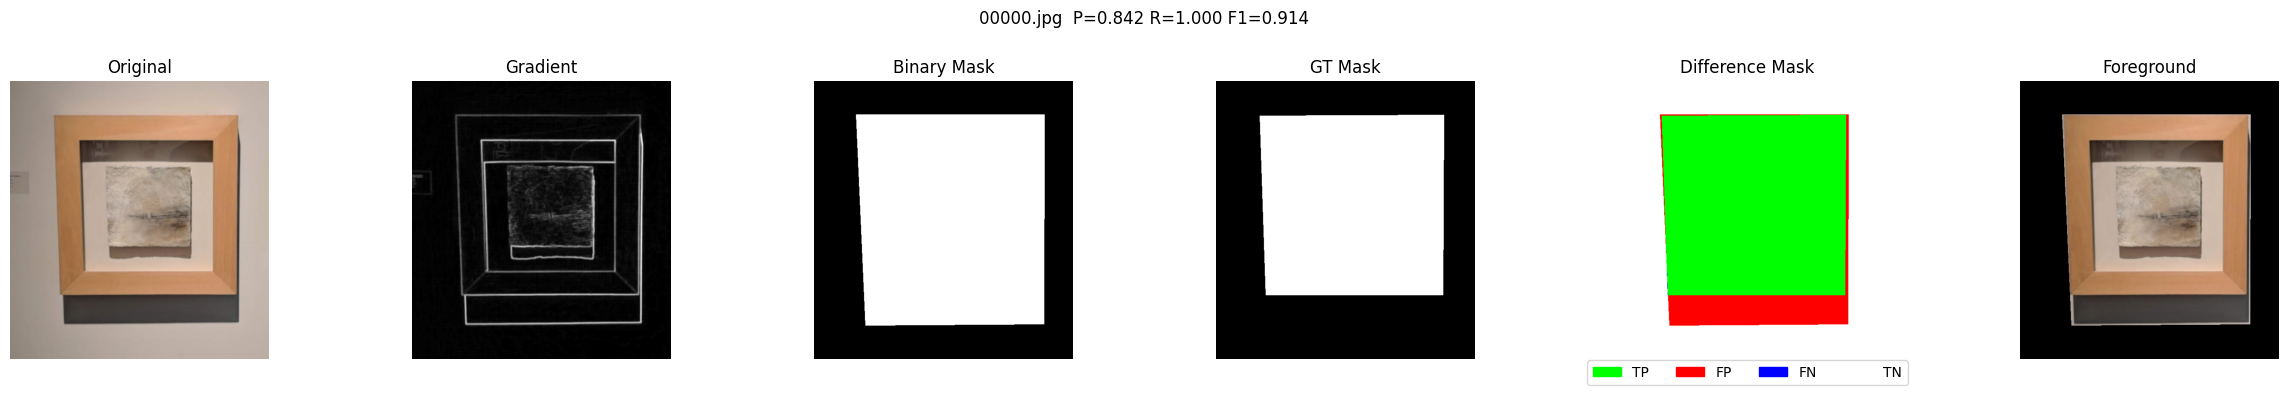

00001.jpg -> Precision: 0.9380, Recall: 1.0000, F1: 0.9680


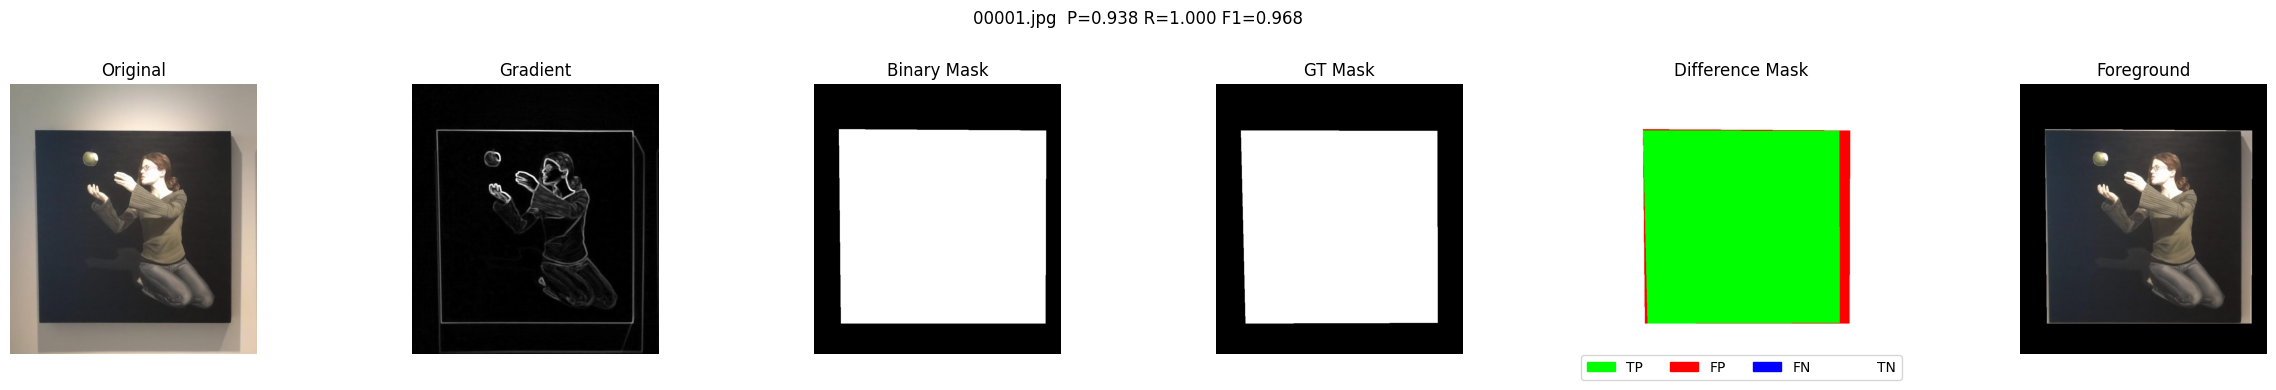

00002.jpg -> Precision: 0.9133, Recall: 1.0000, F1: 0.9547


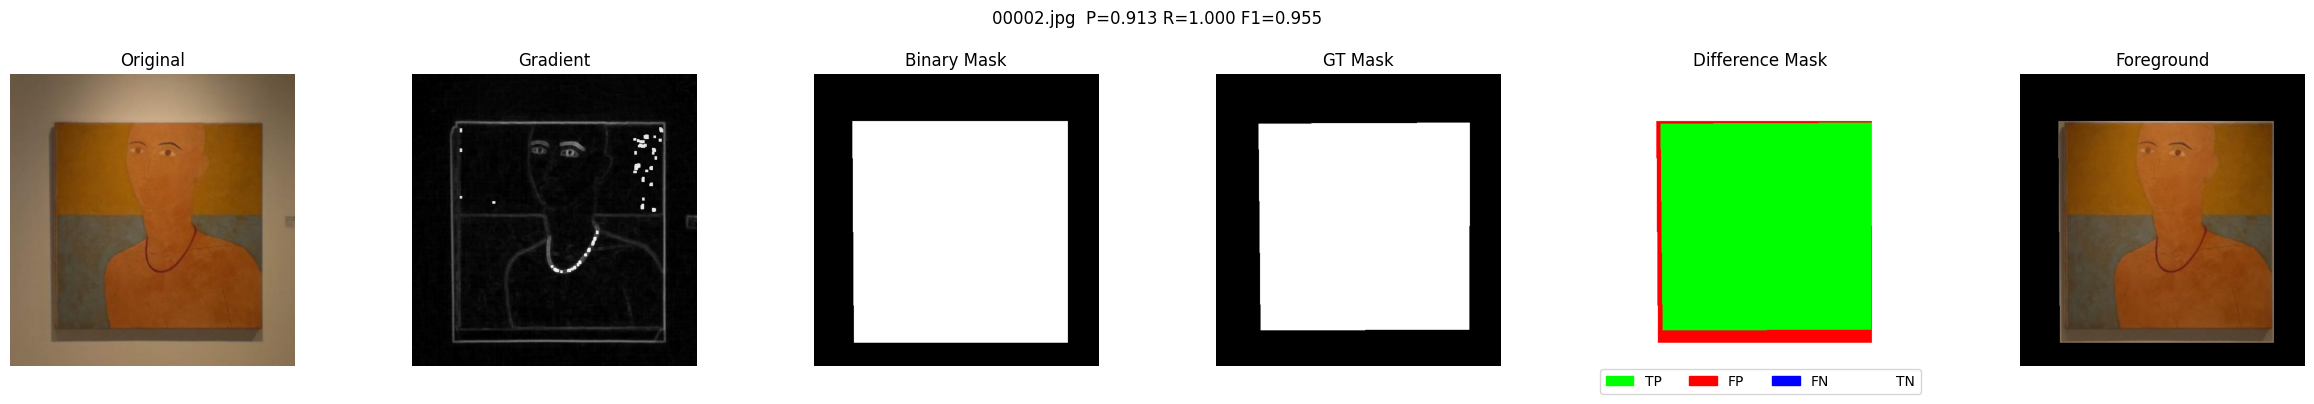

00003.jpg -> Precision: 0.8466, Recall: 1.0000, F1: 0.9169


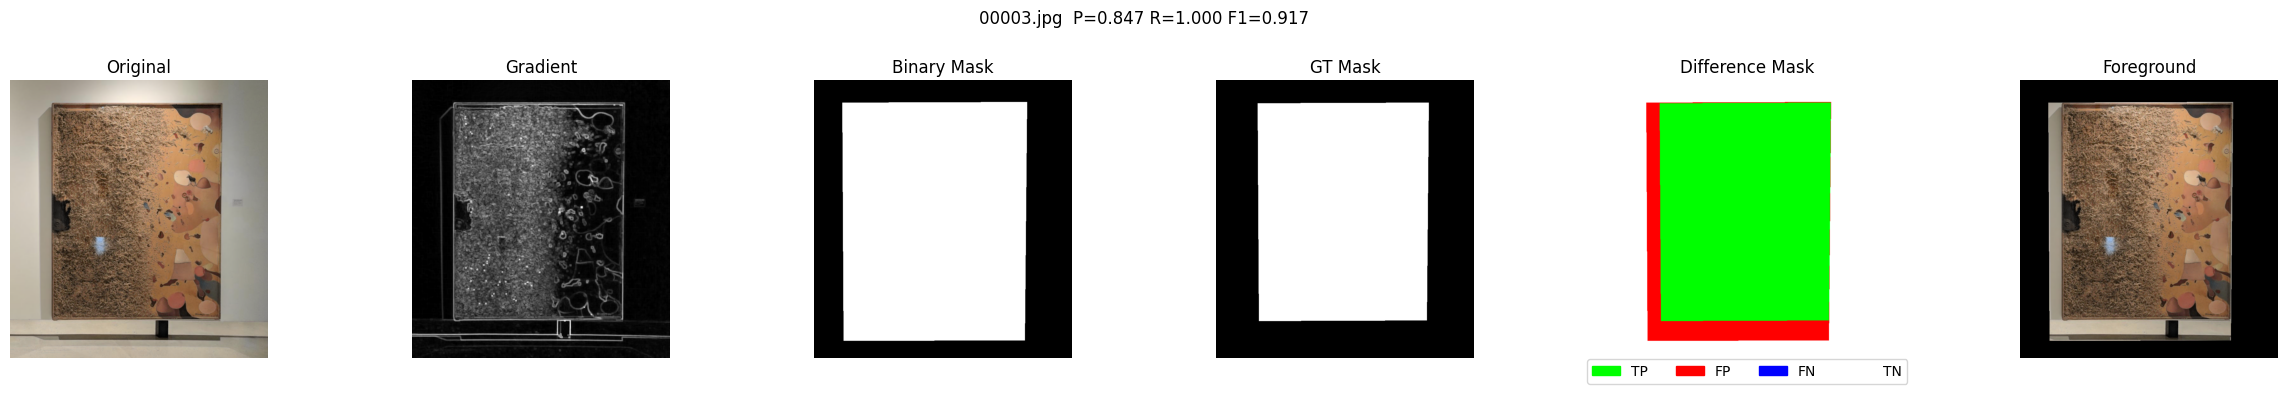

00004.jpg -> Precision: 0.8561, Recall: 1.0000, F1: 0.9225


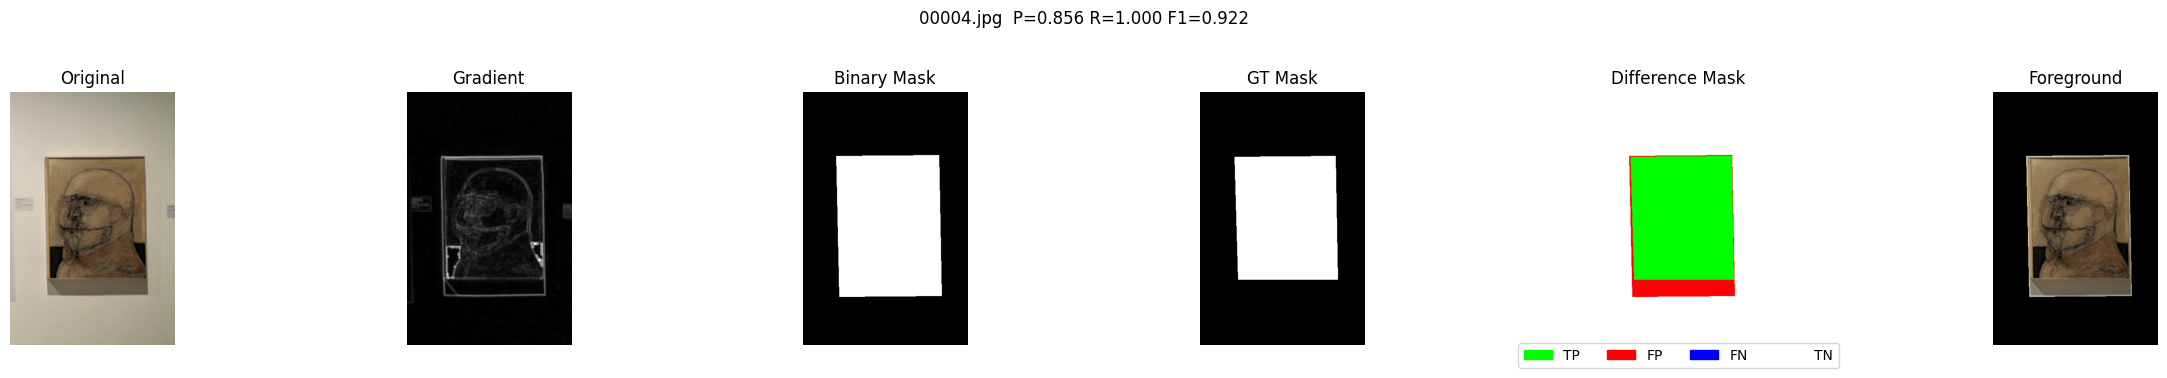

00005.jpg -> Precision: 0.9967, Recall: 0.9950, F1: 0.9958


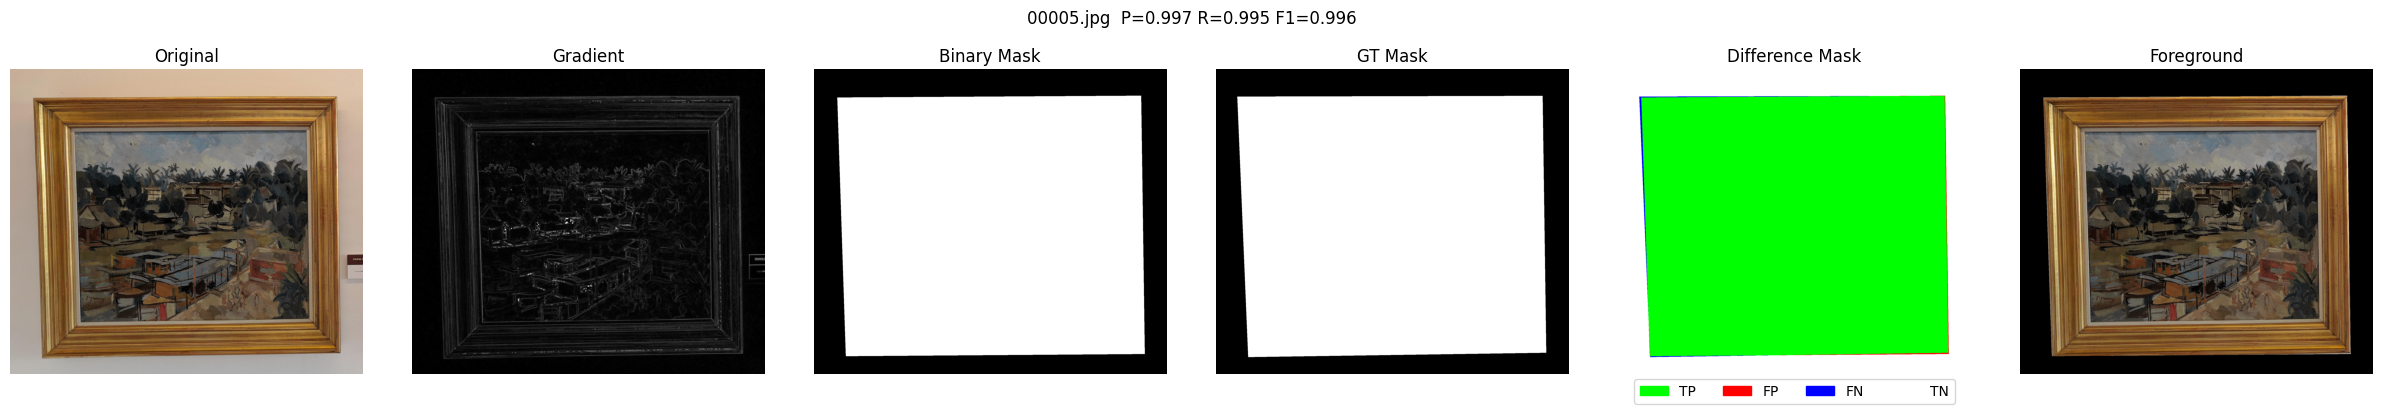

00006.jpg -> Precision: 0.9938, Recall: 0.9993, F1: 0.9965


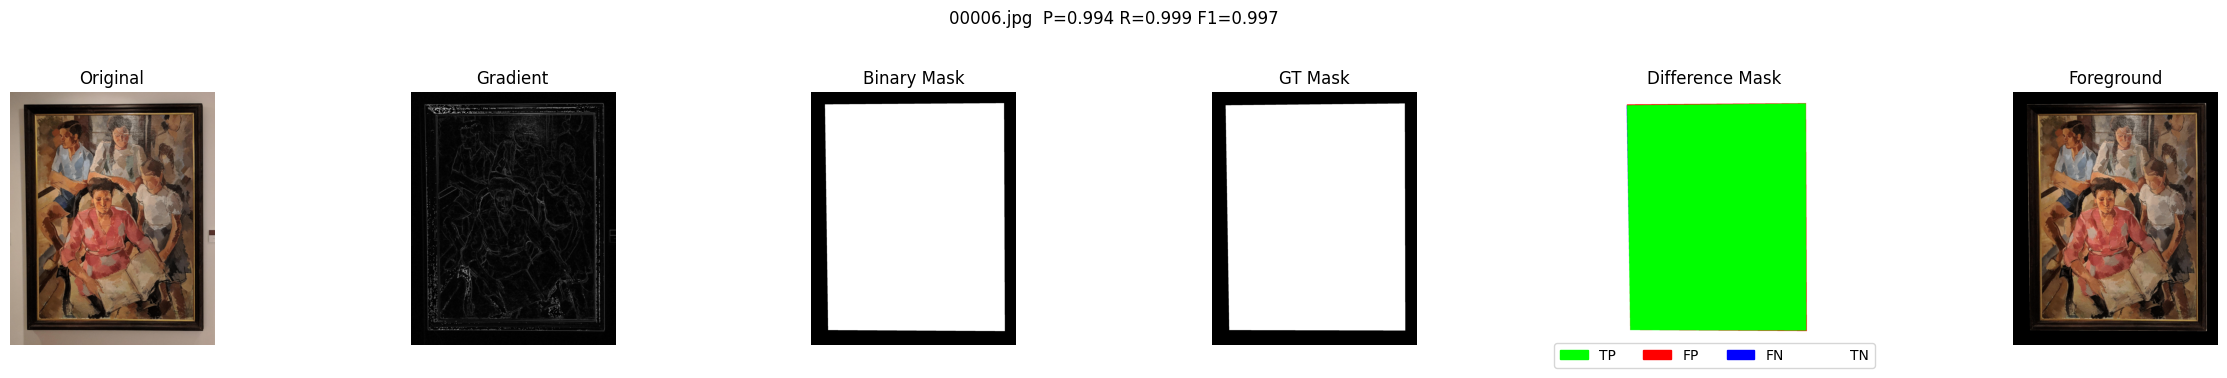

00007.jpg -> Precision: 0.8743, Recall: 1.0000, F1: 0.9329


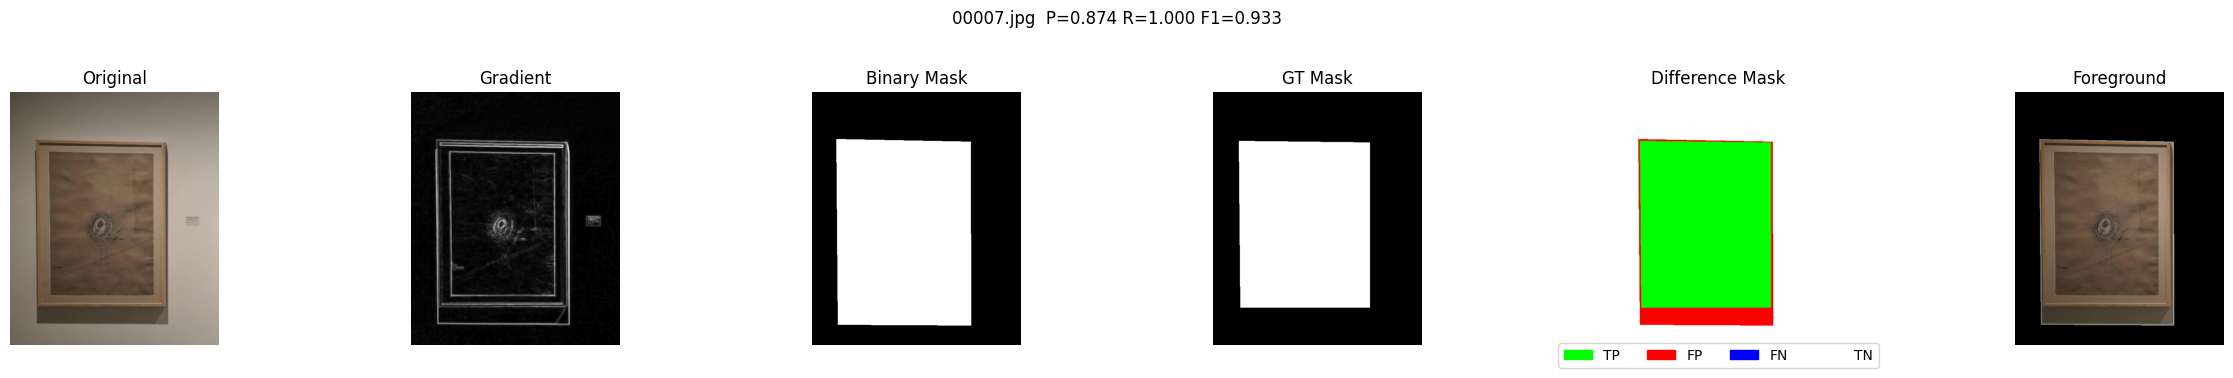

00008.jpg -> Precision: 0.9461, Recall: 1.0000, F1: 0.9723


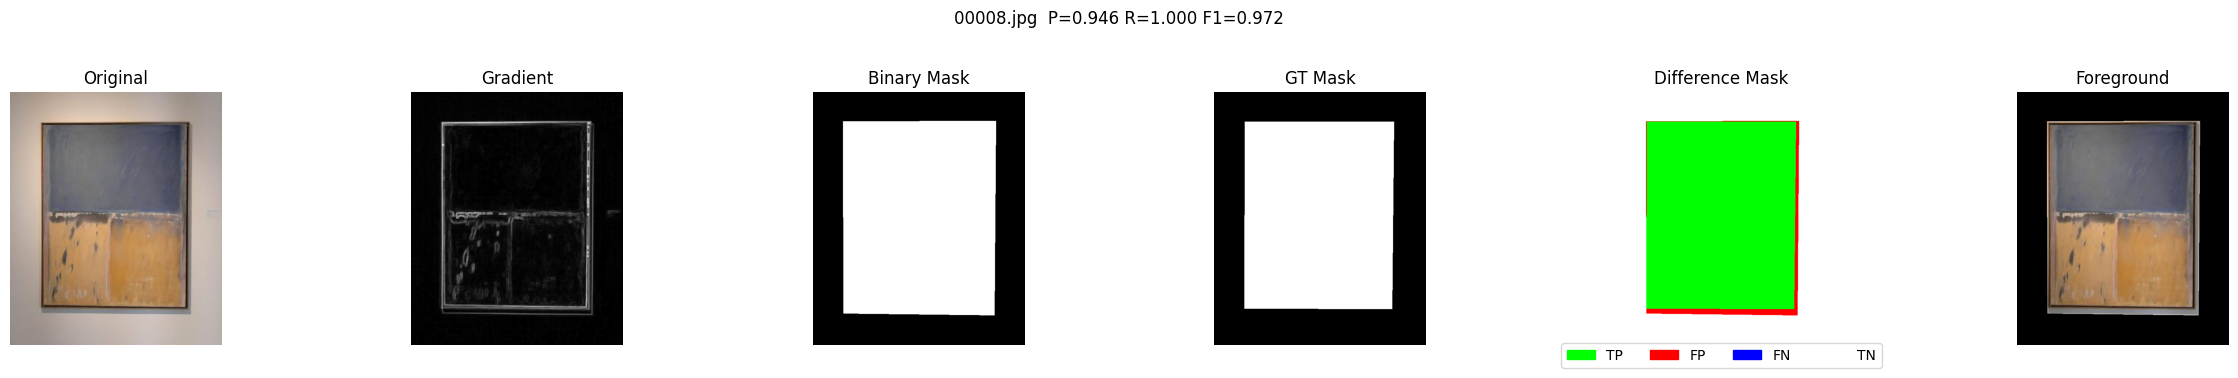

00009.jpg -> Precision: 0.8465, Recall: 0.9994, F1: 0.9166


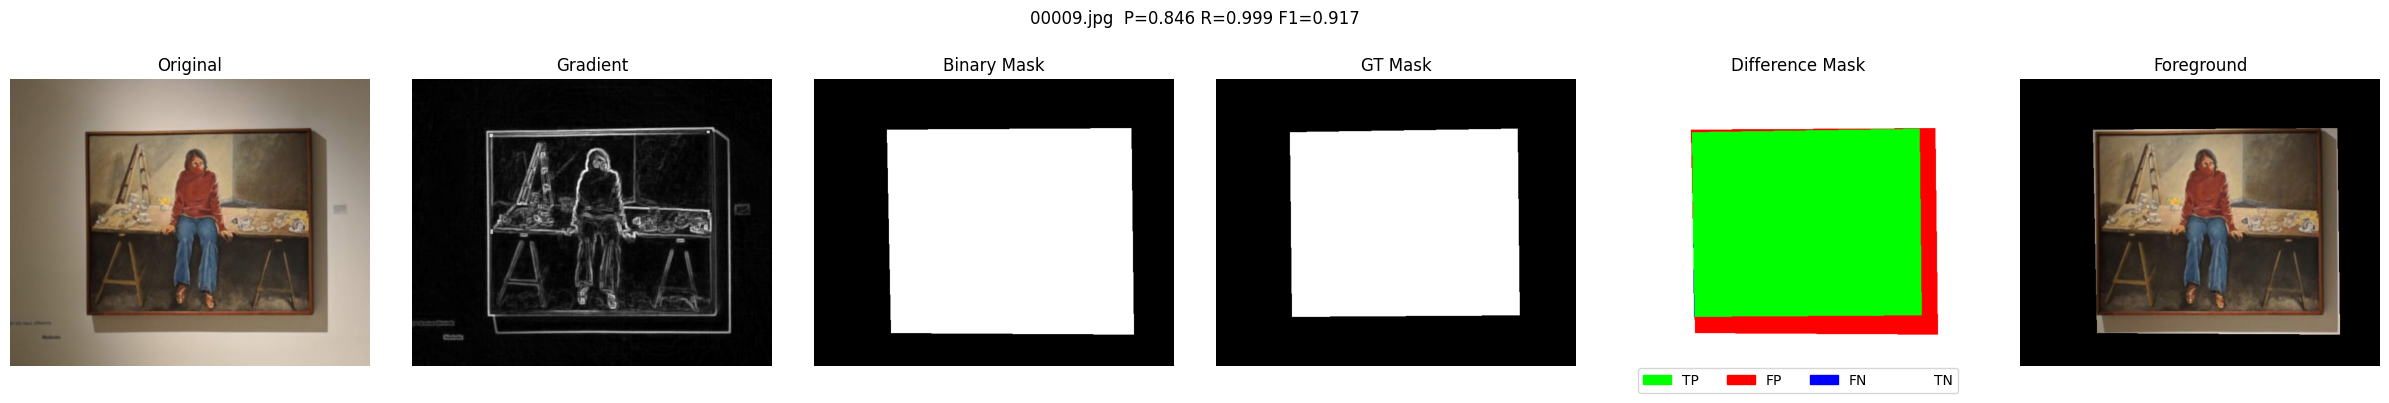

00010.jpg -> Precision: 0.9823, Recall: 0.9984, F1: 0.9903


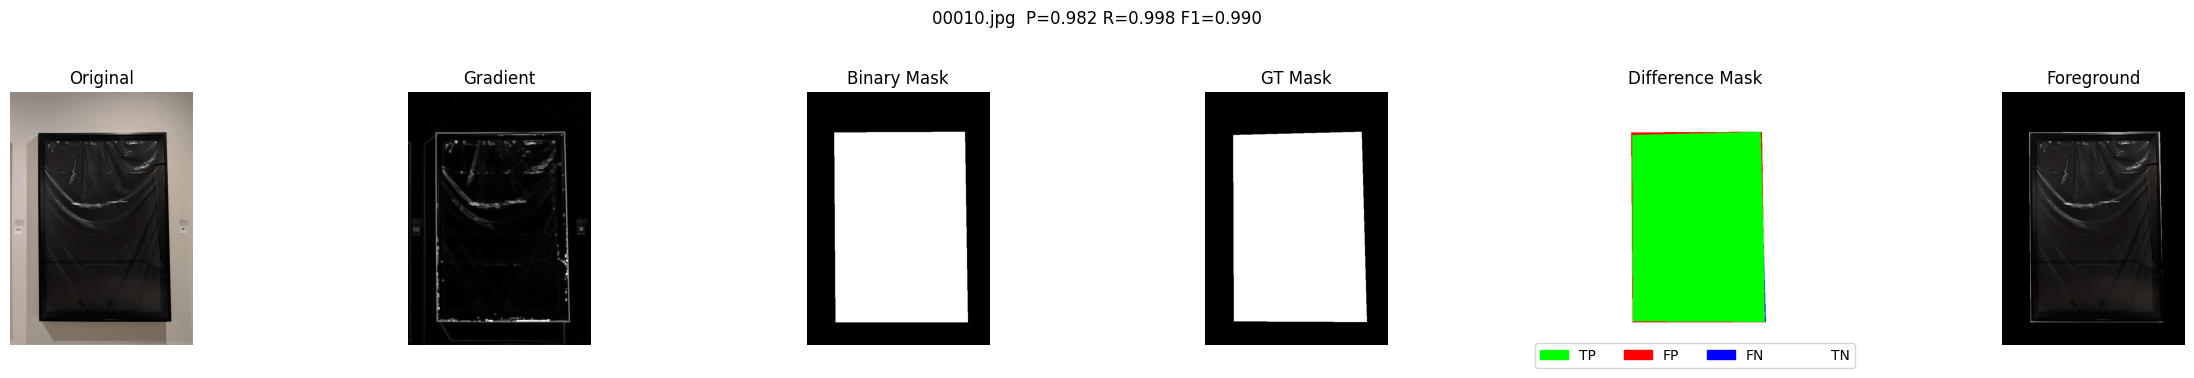

00011.jpg -> Precision: 0.9938, Recall: 0.9971, F1: 0.9954


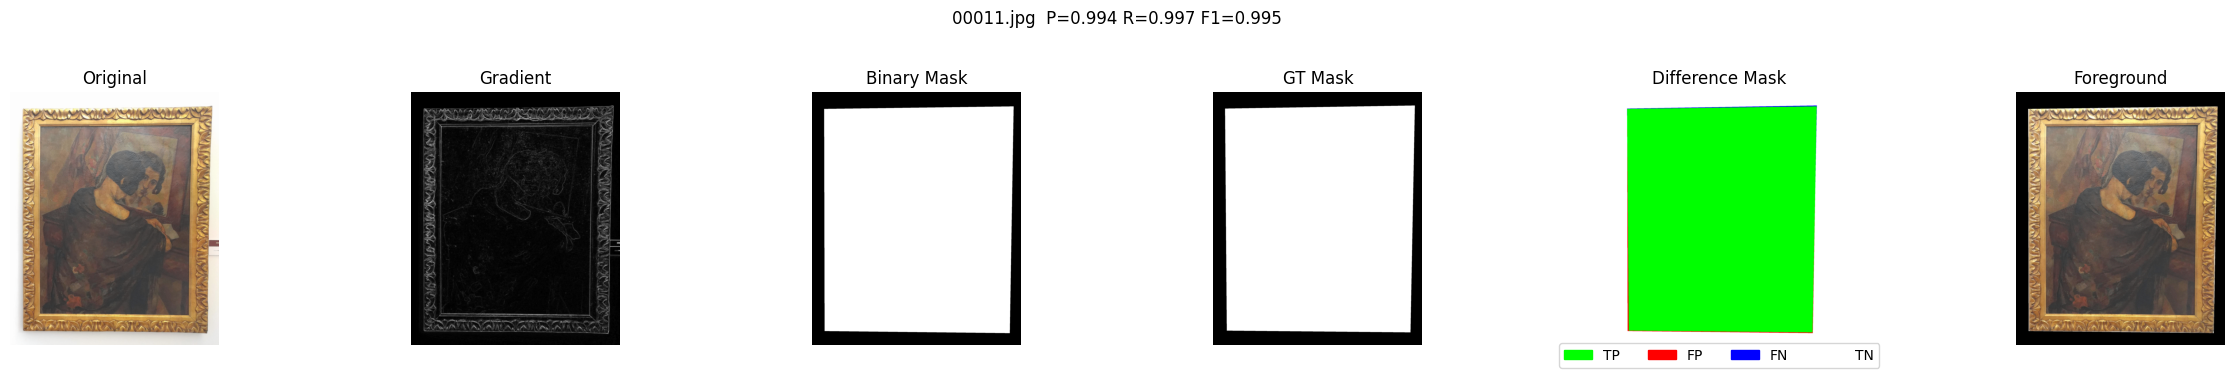

00012.jpg -> Precision: 0.9933, Recall: 0.9961, F1: 0.9947


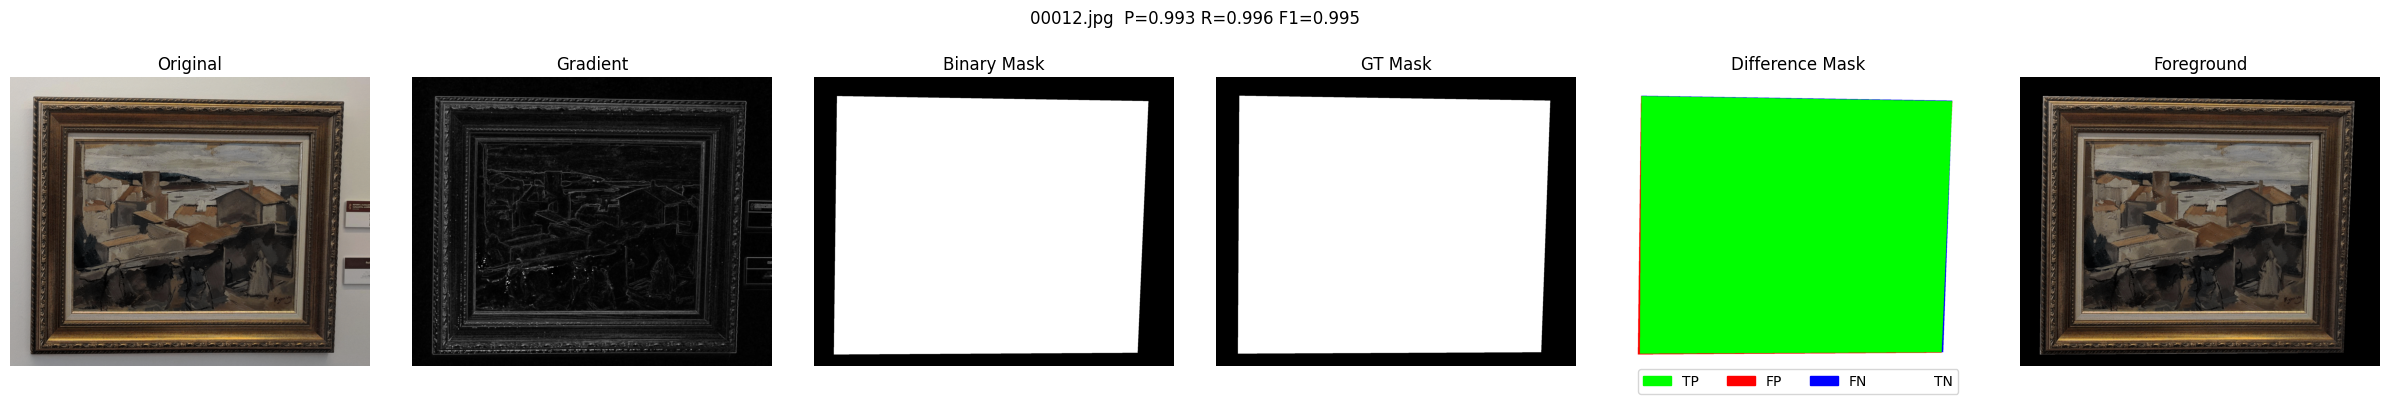

00013.jpg -> Precision: 0.9809, Recall: 0.8983, F1: 0.9378


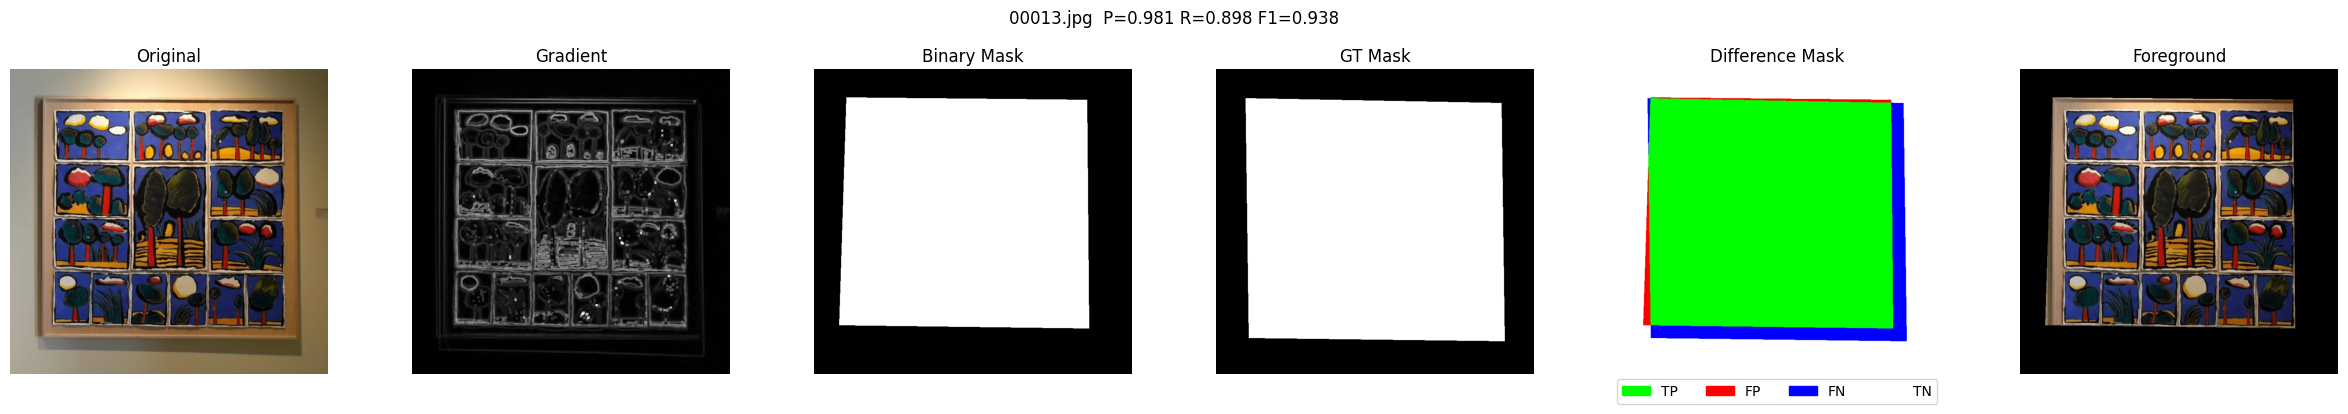

00014.jpg -> Precision: 0.8166, Recall: 0.9954, F1: 0.8972


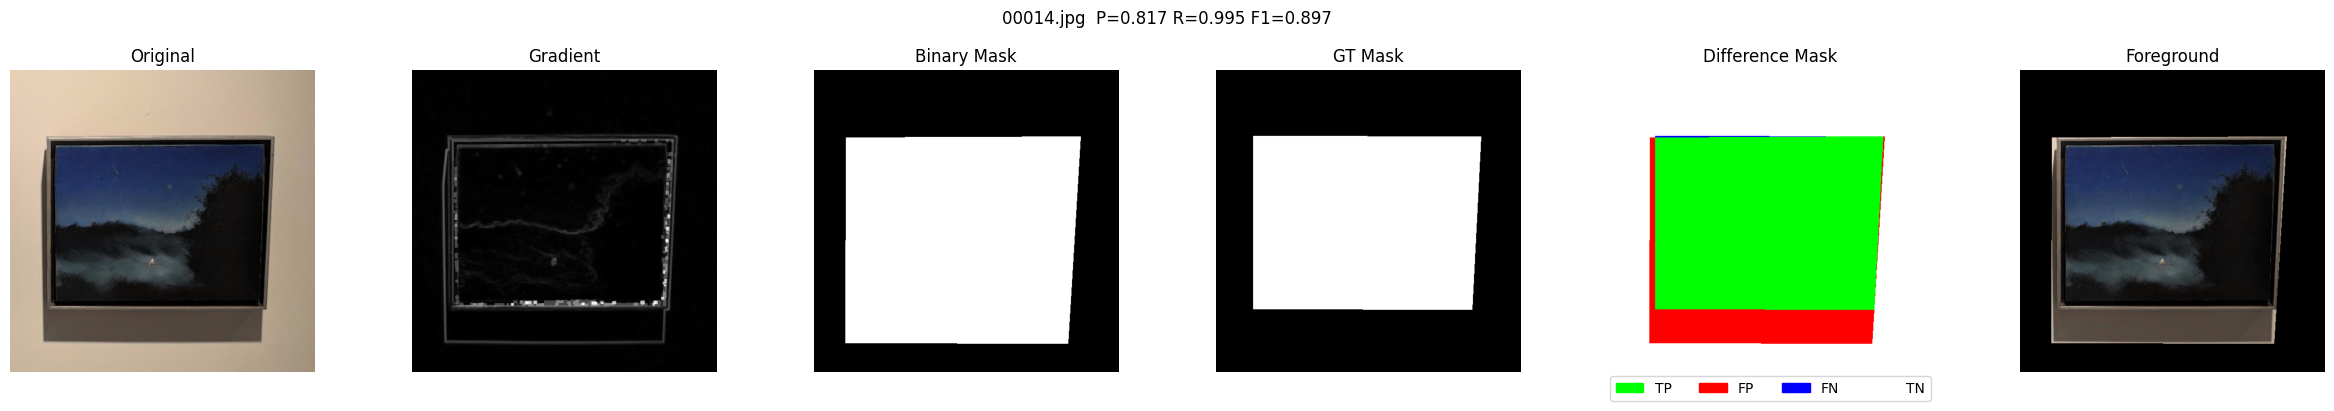

00015.jpg -> Precision: 1.0000, Recall: 0.9630, F1: 0.9812


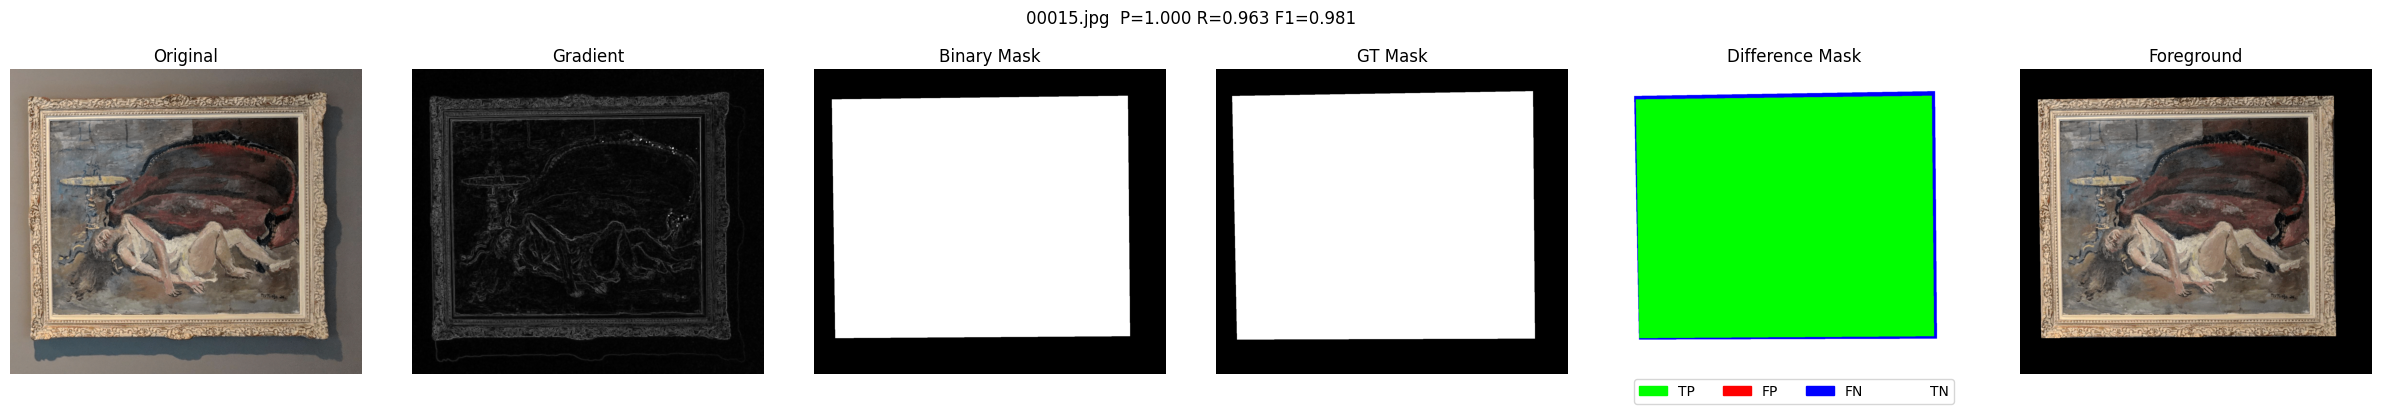

00016.jpg -> Precision: 1.0000, Recall: 0.9830, F1: 0.9914


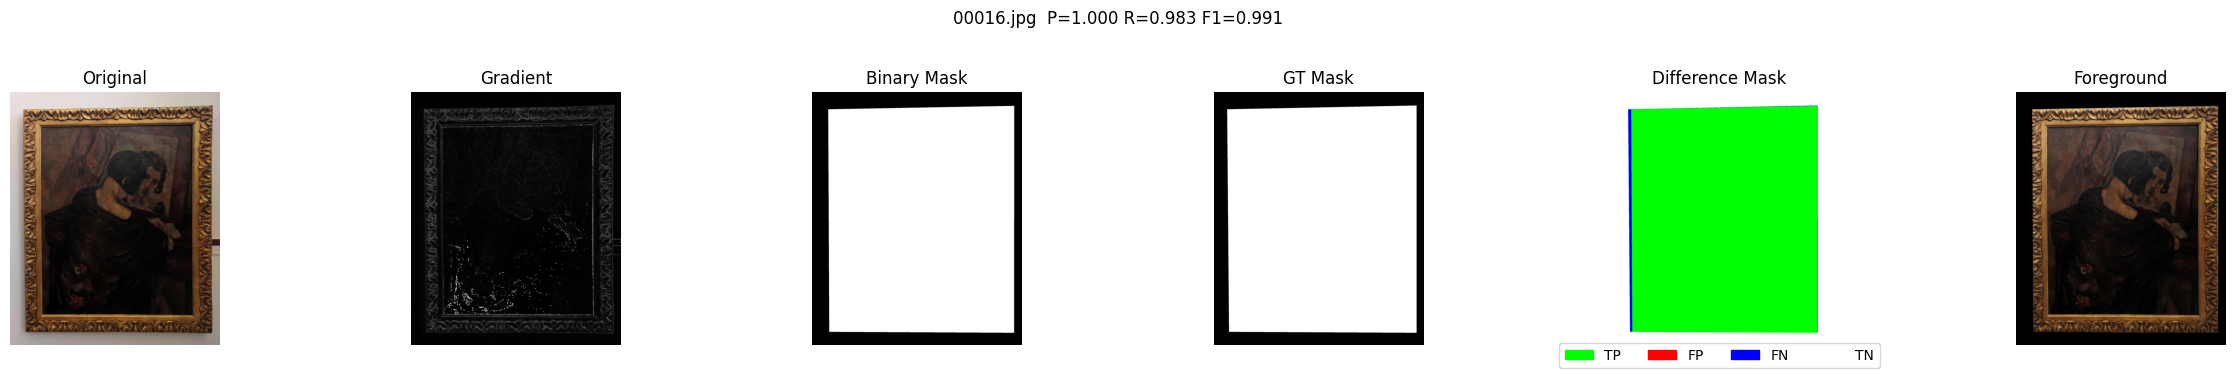

00017.jpg -> Precision: 0.9999, Recall: 0.9867, F1: 0.9933


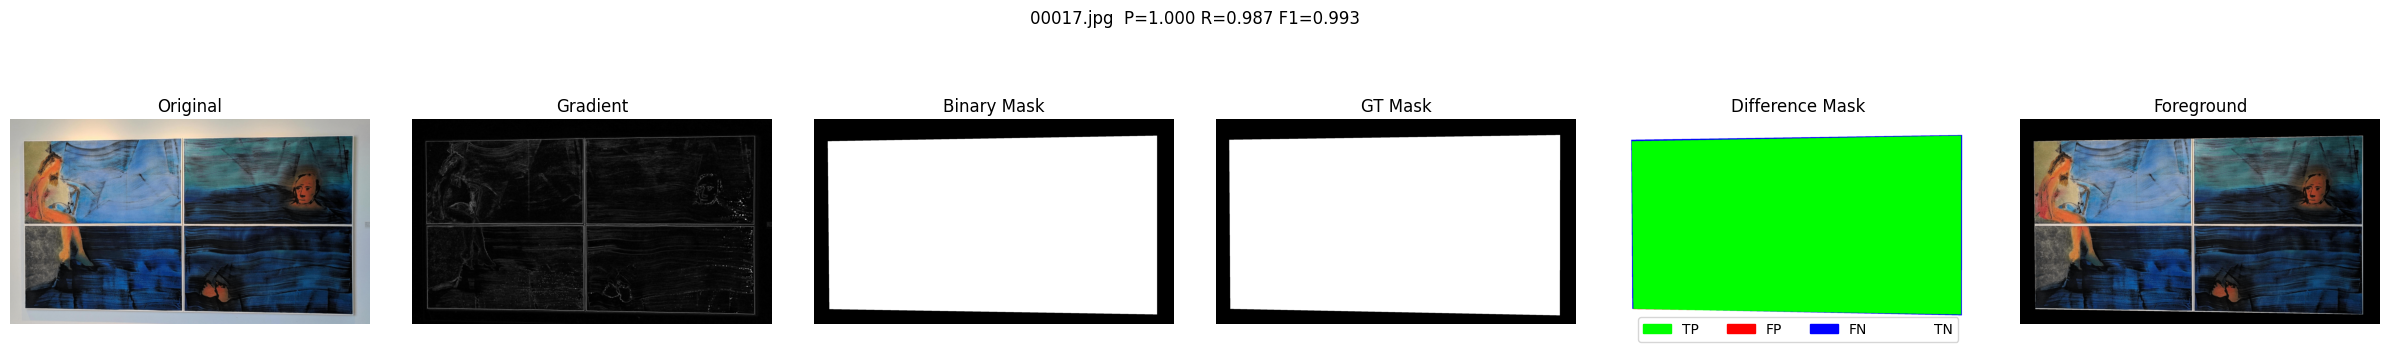

00018.jpg -> Precision: 0.9178, Recall: 1.0000, F1: 0.9571


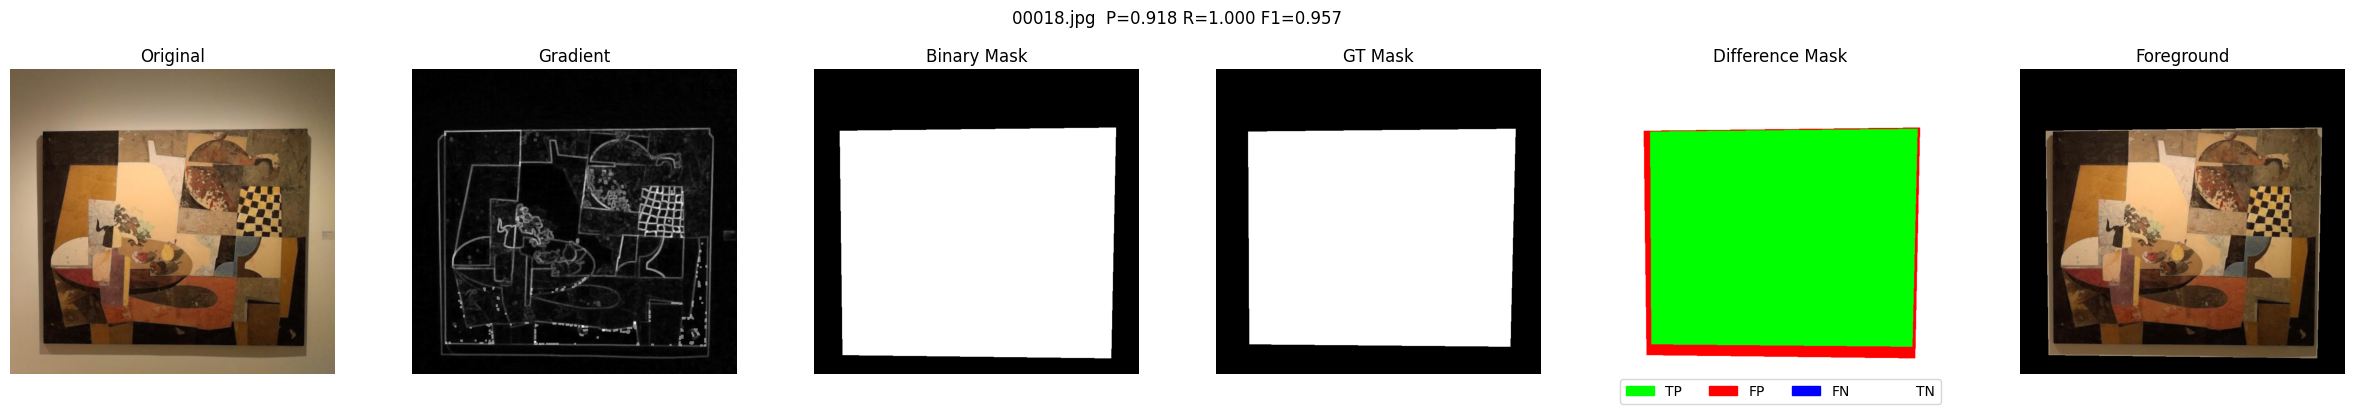

00019.jpg -> Precision: 0.9518, Recall: 1.0000, F1: 0.9753


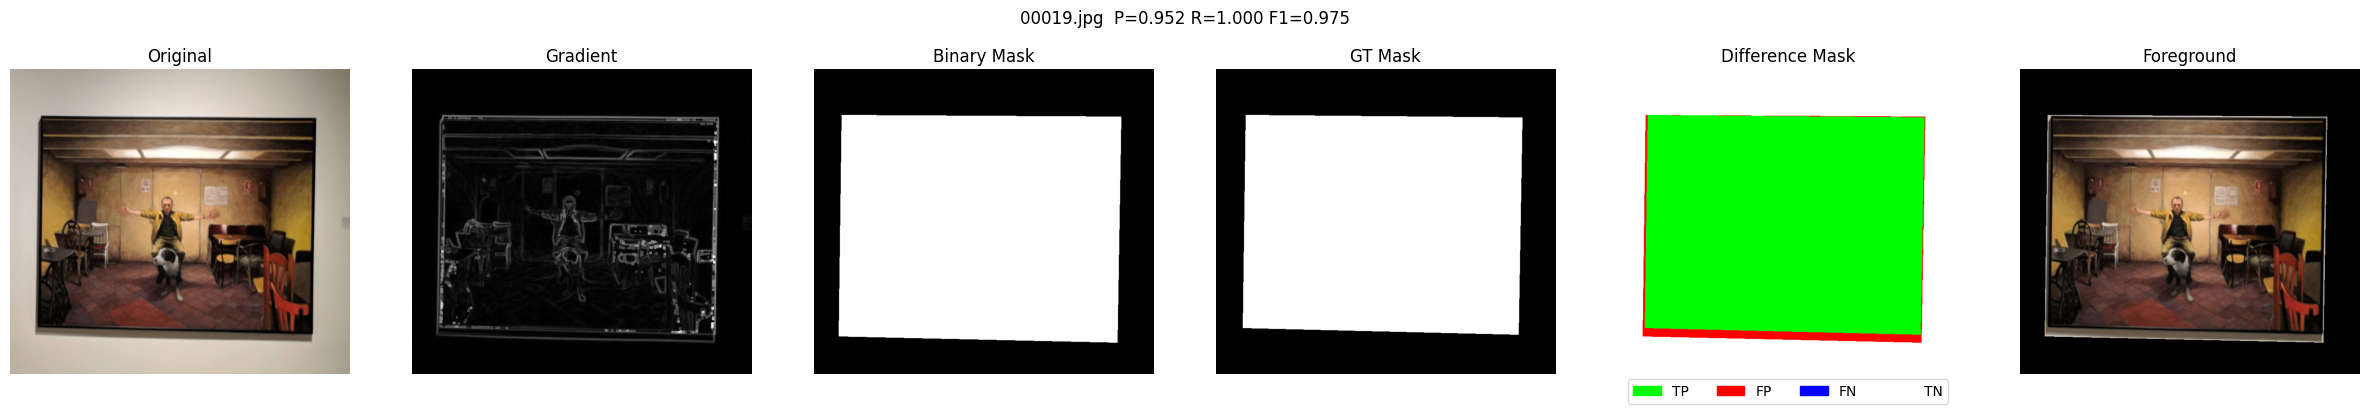

00020.jpg -> Precision: 0.9615, Recall: 1.0000, F1: 0.9804


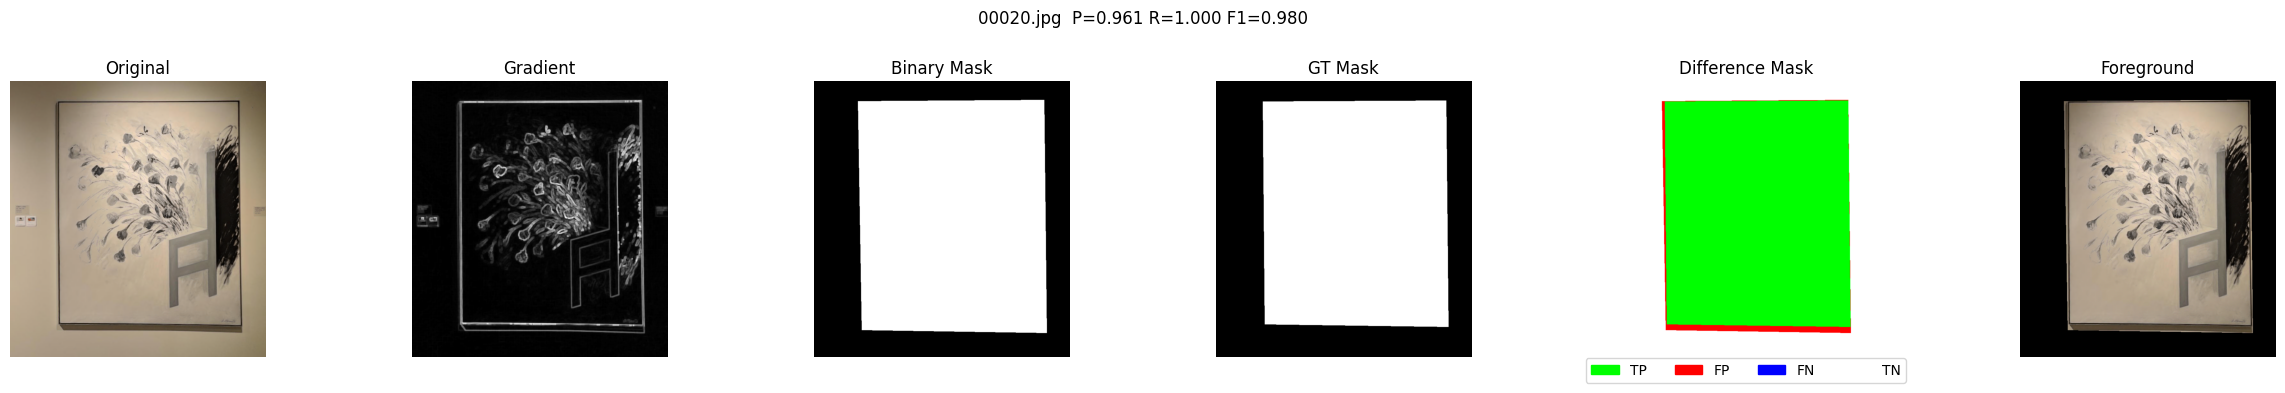

00021.jpg -> Precision: 0.9192, Recall: 1.0000, F1: 0.9579


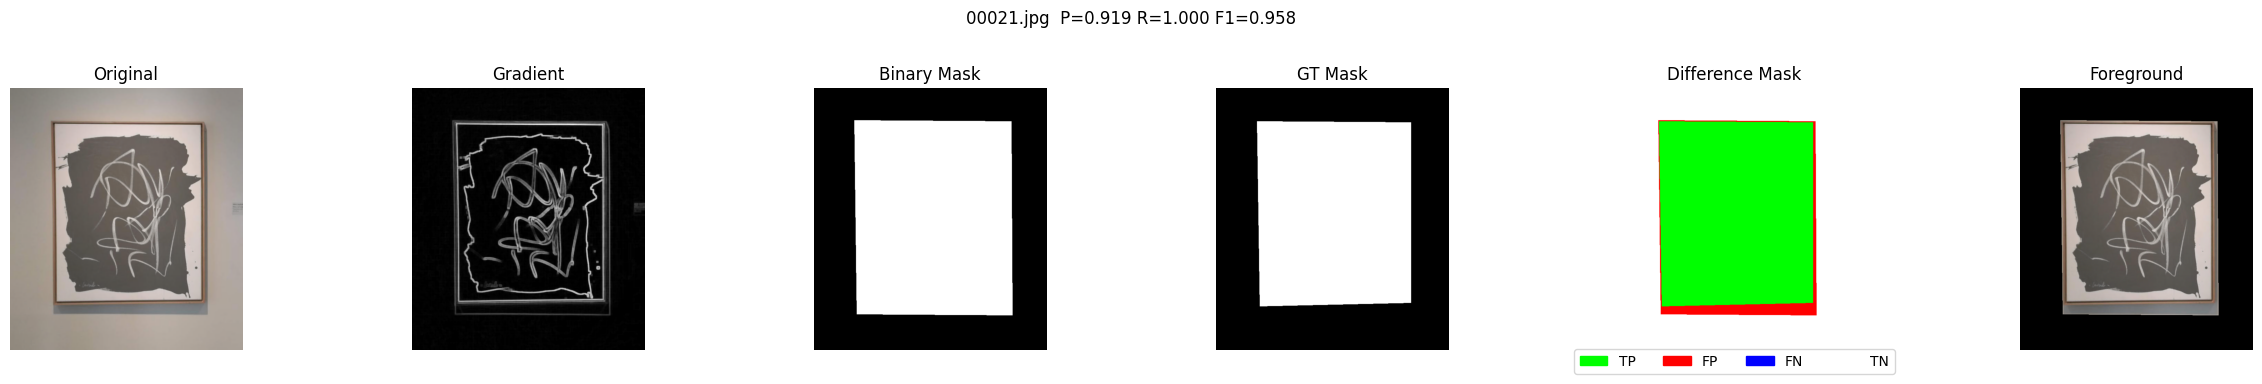

00022.jpg -> Precision: 0.8829, Recall: 1.0000, F1: 0.9378


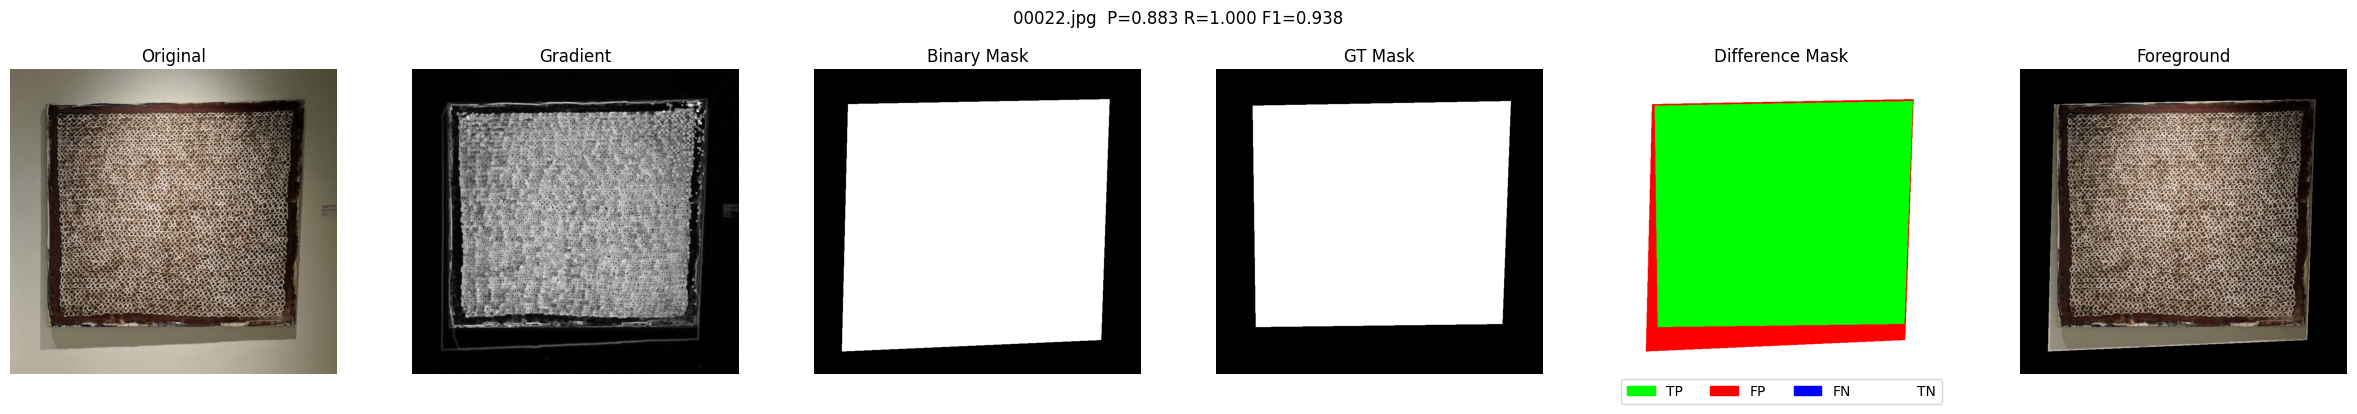

00023.jpg -> Precision: 0.9955, Recall: 0.9796, F1: 0.9875


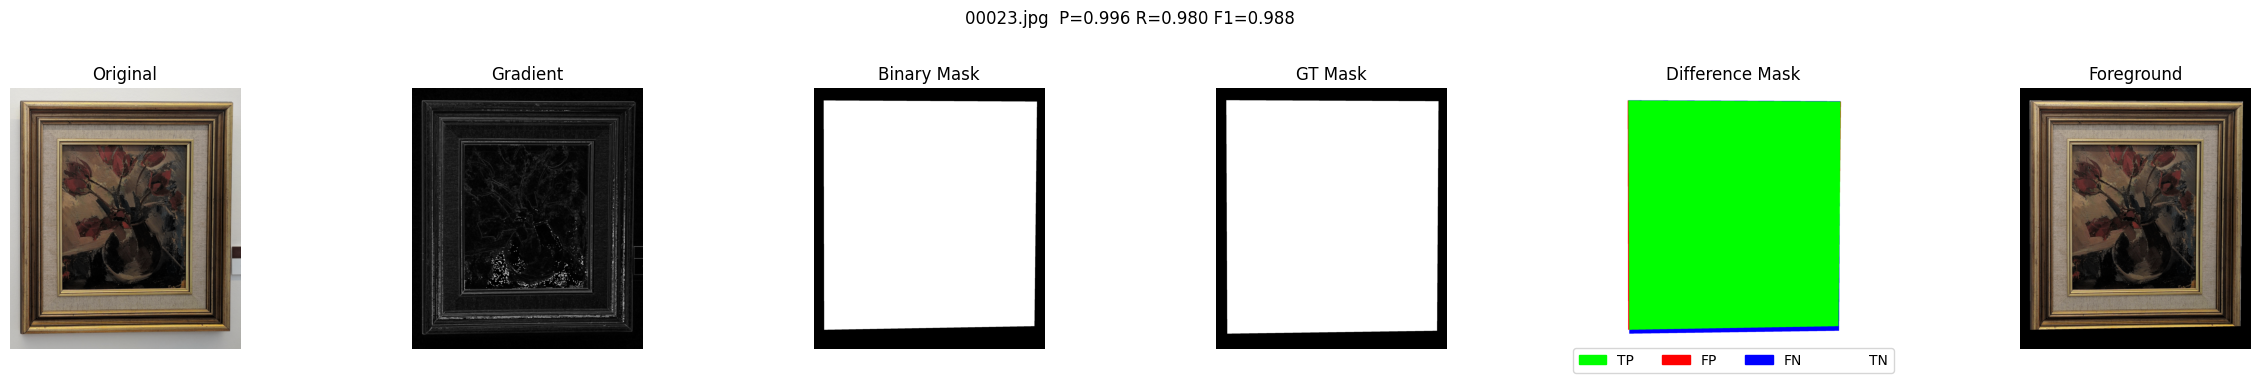

00024.jpg -> Precision: 0.9370, Recall: 0.9998, F1: 0.9674


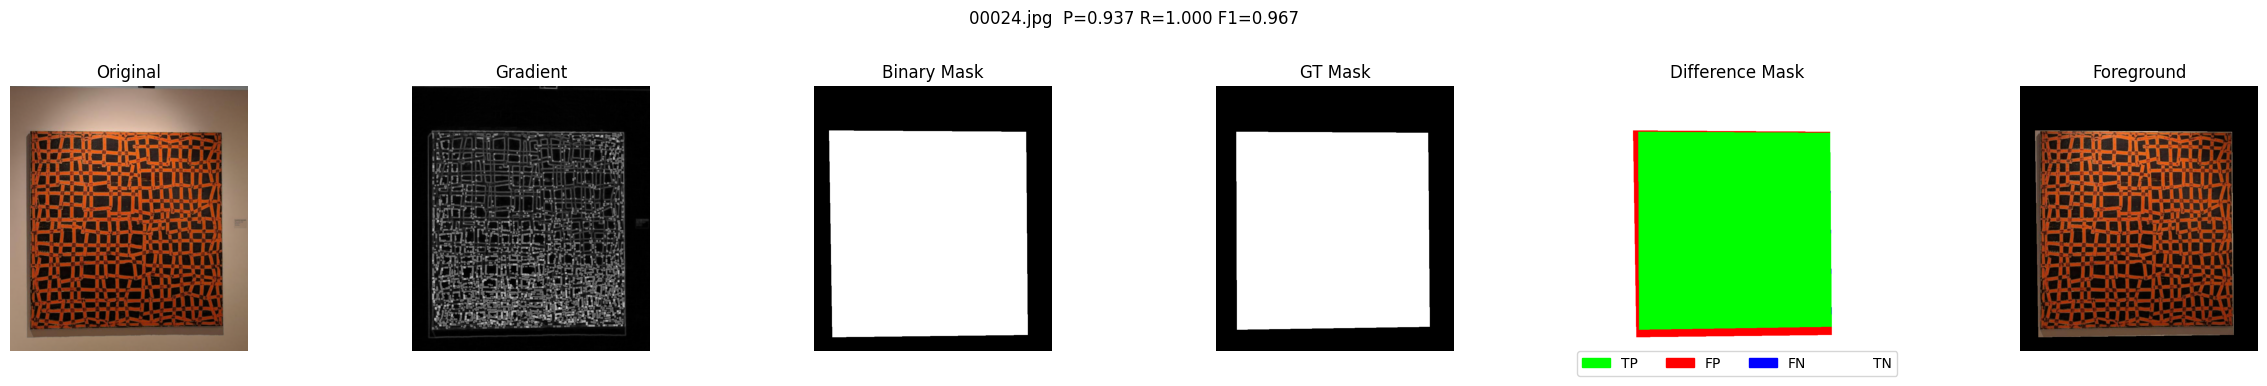

00025.jpg -> Precision: 0.9781, Recall: 0.9656, F1: 0.9718


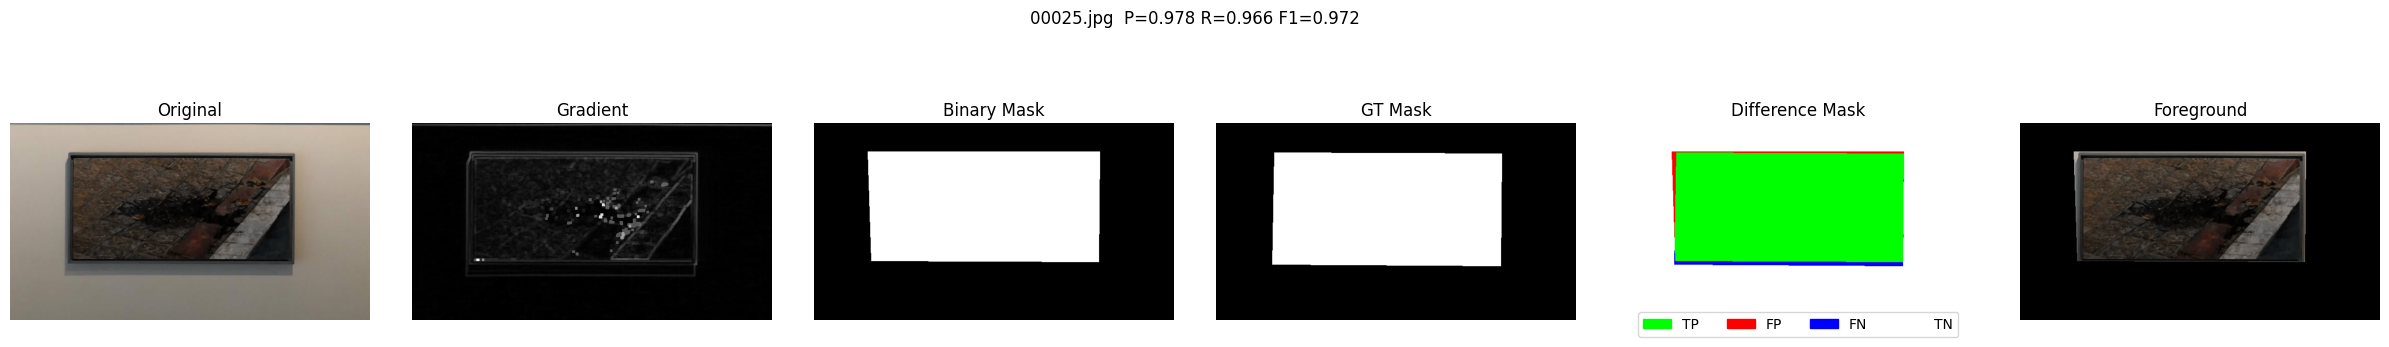

00026.jpg -> Precision: 0.8991, Recall: 1.0000, F1: 0.9469


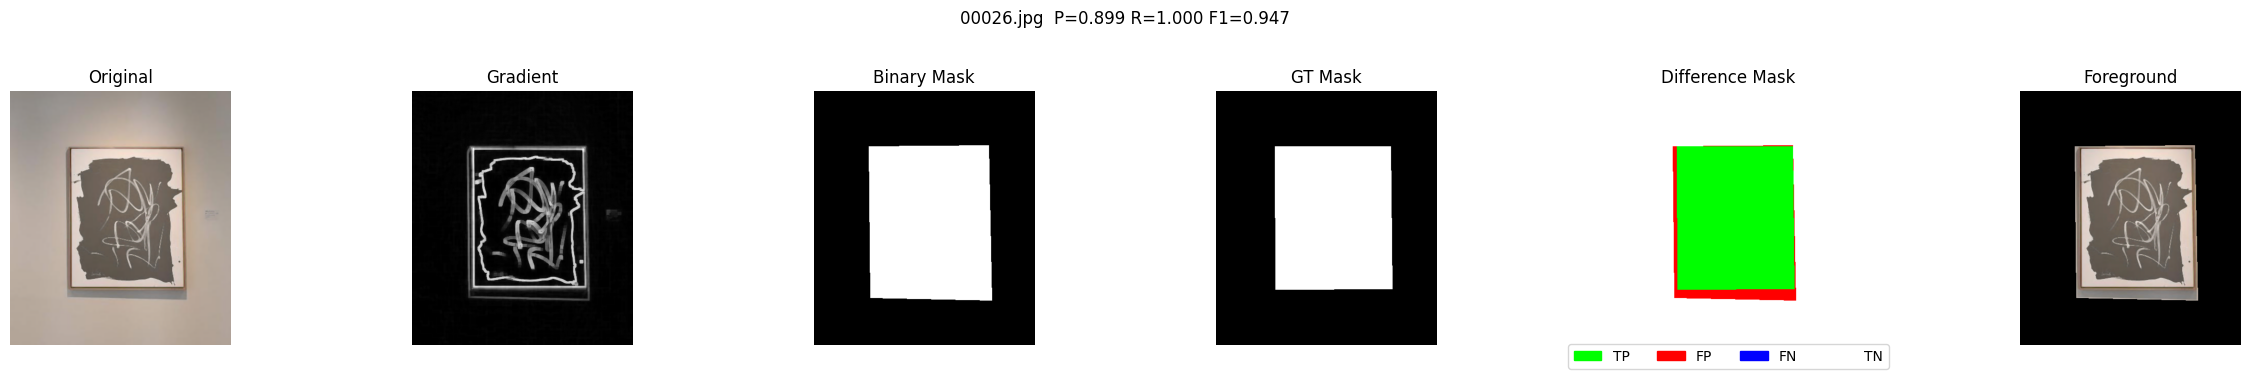

00027.jpg -> Precision: 0.9033, Recall: 1.0000, F1: 0.9492


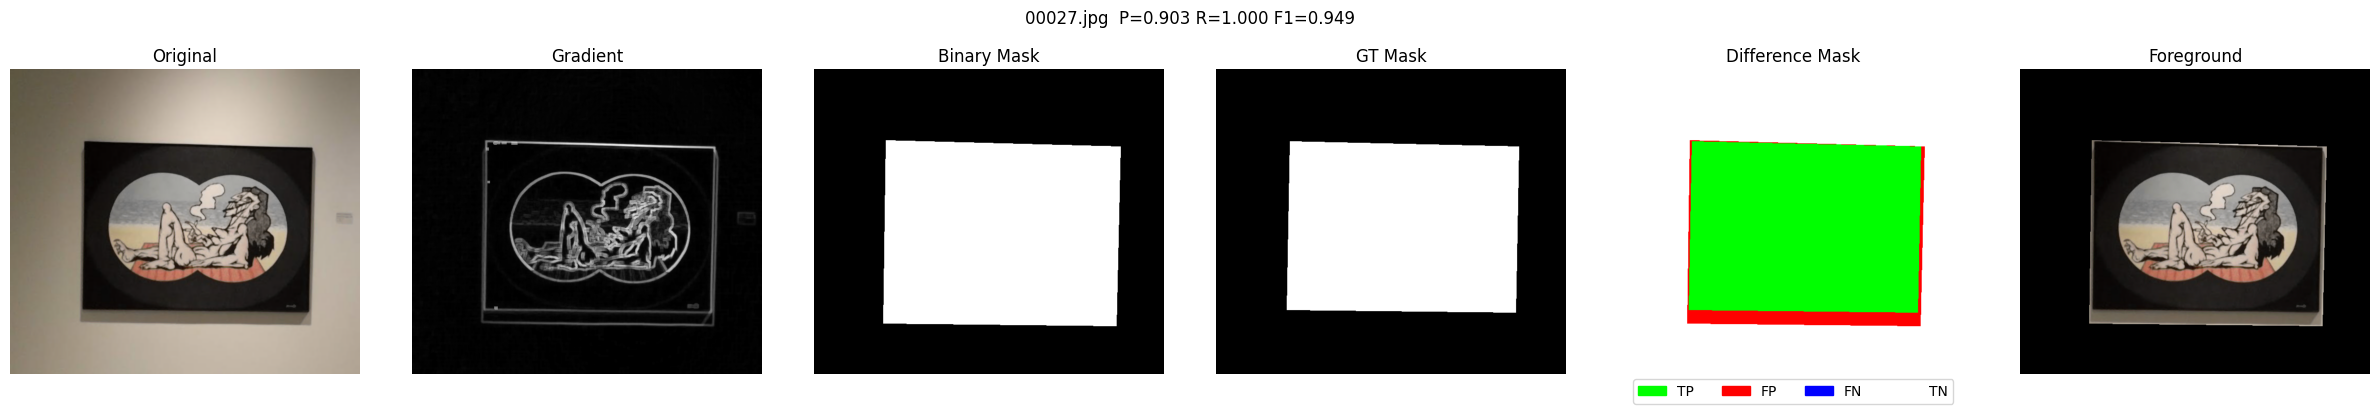

00028.jpg -> Precision: 0.9270, Recall: 0.9912, F1: 0.9580


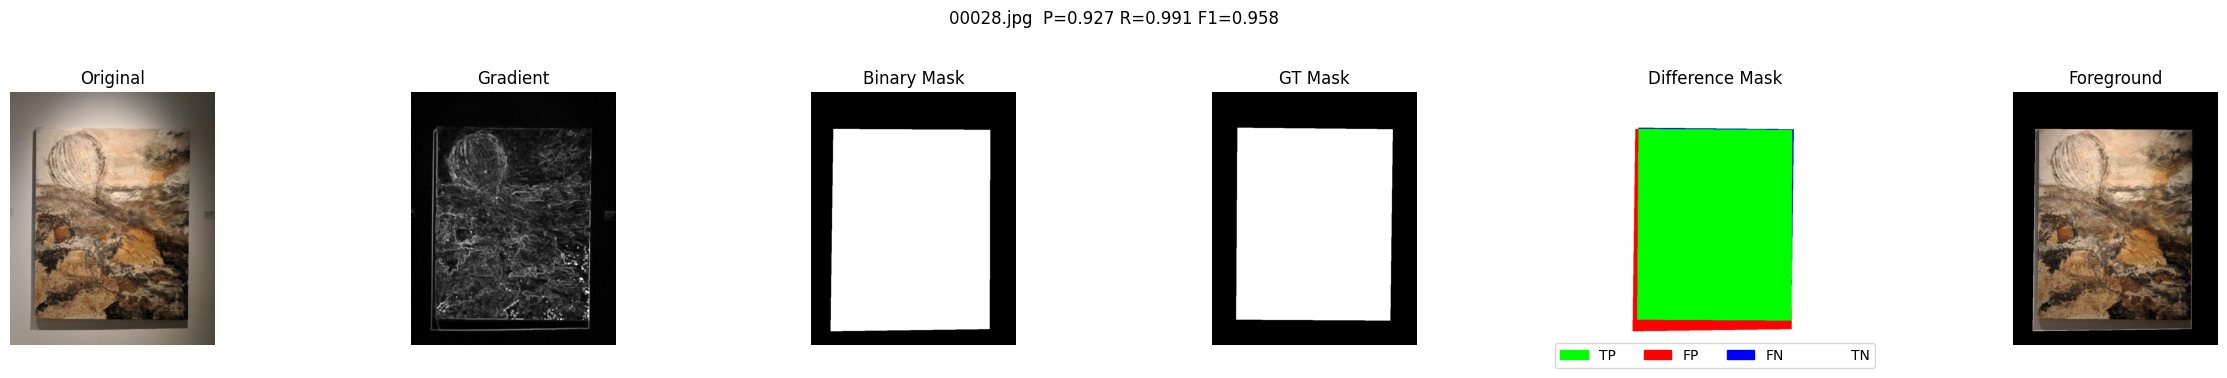

00029.jpg -> Precision: 0.9192, Recall: 0.9745, F1: 0.9460


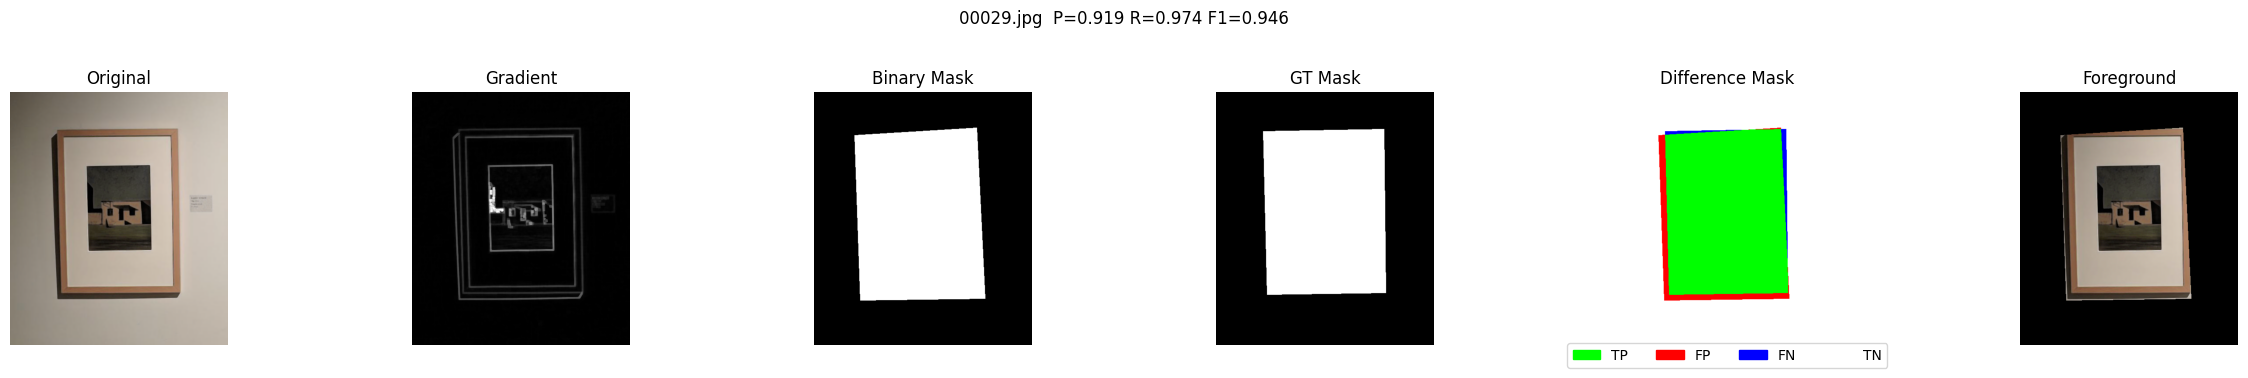


=== Global pixel-wise metrics ===
Global Precision: 0.9337
Global Recall:    0.9907
Global F1:        0.9602


In [ ]:
# Iterar sobre imágenes, comparar con GT, calcular métricas y mostrar resultados
import matplotlib.patches as mpatches

# Toggle plotting of images. Set to False to speed-up and only print metrics.
SHOW_PLOTS = True

precisions = []
recalls = []
f1s = []

for idx, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    im = imageio.imread(image_path)
    # Now the function returns the gradient as grad_norm (2D uint8) instead of using a global debug list
    original_image, pred_mask, foreground, grad_norm = remove_background_morphological_gradient(im)

    
    # Asegurar máscara booleana predicha
    pred_bool = pred_mask.astype(bool)

    # Cargar GT (mismo nombre .png) y convertir a máscara booleana
    base = os.path.splitext(image_file)[0]
    gt_path = os.path.join(image_folder, base + '.png')
    if os.path.exists(gt_path):
        gt_raw = imageio.imread(gt_path)
        # Si GT tiene canales, convertir a gris
        if gt_raw.ndim == 3:
            gt_gray = rgb2gray(gt_raw)
        else:
            gt_gray = gt_raw
        gt_bool = gt_gray > 127
    else:
        gt_bool = np.zeros(pred_bool.shape, dtype=bool)

    # Calcular TP, FP, FN, TN (por píxel)
    TP = np.logical_and(pred_bool, gt_bool).sum()
    FP = np.logical_and(pred_bool, np.logical_not(gt_bool)).sum()
    FN = np.logical_and(np.logical_not(pred_bool), gt_bool).sum()
    TN = np.logical_and(np.logical_not(pred_bool), np.logical_not(gt_bool)).sum()

    # Precision, Recall, F1 para la imagen
    P = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    R = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    F1 = 2 * P * R / (P + R) if (P + R) > 0 else 0.0

    precisions.append(P)
    recalls.append(R)
    f1s.append(F1)

    print(f"{image_file} -> Precision: {P:.4f}, Recall: {R:.4f}, F1: {F1:.4f}")

    # If plotting is disabled, skip constructing and showing figures
    if not SHOW_PLOTS:
        continue

    # Create image of difference coloured (TP=green, FP=red, FN=blue, TN=white)
    h, w = pred_bool.shape
    diff_rgb = np.zeros((h, w, 3), dtype=np.uint8)
    diff_rgb[np.logical_and(pred_bool, gt_bool)] = [0, 255, 0]     # TP verde
    diff_rgb[np.logical_and(pred_bool, np.logical_not(gt_bool))] = [255, 0, 0]  # FP rojo
    diff_rgb[np.logical_and(np.logical_not(pred_bool), gt_bool)] = [0, 0, 255]  # FN azul
    diff_rgb[np.logical_and(np.logical_not(pred_bool), np.logical_not(gt_bool))] = [255, 255, 255]  # TN blanco

    # Prepare gradient RGB for display (stack single-channel to 3)
    grad_rgb = np.stack([grad_norm, grad_norm, grad_norm], axis=-1)

    # Mostrar: Original | Gradient | Binary Mask | GT Mask | Difference Mask | Foreground
    plt.figure(figsize=(24, 4))

    plt.subplot(1, 6, 1)
    plt.title('Original')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 6, 2)
    plt.title('Gradient')
    plt.imshow(grad_rgb)
    plt.axis('off')

    plt.subplot(1, 6, 3)
    plt.title('Binary Mask')
    plt.imshow(pred_bool, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 6, 4)
    plt.title('GT Mask')
    plt.imshow(gt_bool, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 6, 5)
    plt.title('Difference Mask')
    plt.imshow(diff_rgb)
    plt.axis('off')

    # Leyenda para Difference Mask
    patches = [
        mpatches.Patch(color=(0, 1, 0), label='TP'),
        mpatches.Patch(color=(1, 0, 0), label='FP'),
        mpatches.Patch(color=(0, 0, 1), label='FN'),
        mpatches.Patch(color=(1, 1, 1), label='TN')
    ]
    plt.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=4)

    plt.subplot(1, 6, 6)
    plt.title('Foreground')
    plt.imshow(foreground)
    plt.axis('off')

    plt.suptitle(f"{image_file}  P={P:.3f} R={R:.3f} F1={F1:.3f}")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Métricas globales por píxel (acumuladas)
"""
global_precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0.0
global_recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0.0
global_f1 = 2 * global_precision * global_recall / (global_precision + global_recall) if (global_precision + global_recall) > 0 else 0.0
"""

global_precision = np.mean(precisions)
global_recall = np.mean(recalls)
global_f1 = np.mean(f1s)


print('\n=== Global pixel-wise metrics ===')
print(f'Global Precision: {global_precision:.4f}')
print(f'Global Recall:    {global_recall:.4f}')
print(f'Global F1:        {global_f1:.4f}')